<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:, 0:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

[Text(0, 0, 'health \n 0.65'), Text(0, 0, 'sick\n0.35')]

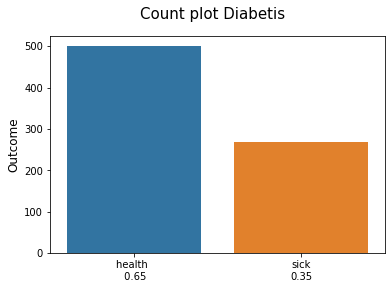

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x=data_values[:,8], ax = ax)
ax.set_ylabel('Outcome', size = 12)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f'% loss)

17/17 [==============================] - 0s 5ms/step - loss: 0.4271 - accuracy: 0.8063 - recall: 0.7333
Recall: 0.733
Accuracy: 0.806
Loss: 0.427


In [9]:
# Problema de optimización
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

8/8 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.7143 - recall: 0.6023
Val Recall: 0.733
Val Accuracy: 0.806
val Loss: 0.427


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# val loss and Loss

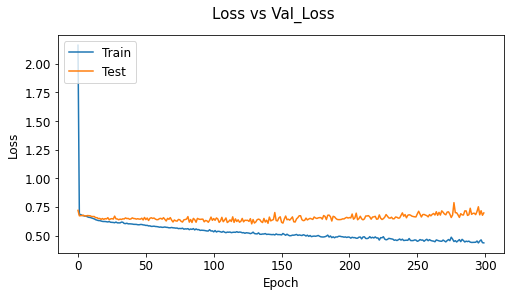

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle('Loss vs Val_Loss', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[0.0, 151.0, 90.0, 46.0, 0.0, 42.1, 0.371, 21.0] --> 0 (real 1)
[0.0, 124.0, 70.0, 20.0, 0.0, 27.4, 0.254, 36.0] --> 0 (real 1)
[7.0, 133.0, 88.0, 15.0, 155.0, 32.4, 0.262, 37.0] --> 0 (real 0)
[17.0, 163.0, 72.0, 41.0, 114.0, 40.9, 0.8170000000000001, 47.0] --> 0 (real 1)
[10.0, 115.0, 98.0, 0.0, 0.0, 24.0, 1.022, 34.0] --> 1 (real 0)
[4.0, 144.0, 58.0, 28.0, 140.0, 29.5, 0.287, 37.0] --> 1 (real 0)
[6.0, 103.0, 72.0, 32.0, 190.0, 37.7, 0.324, 55.0] --> 1 (real 0)
[2.0, 75.0, 64.0, 24.0, 55.0, 29.7, 0.37, 33.0] --> 0 (real 0)
[2.0, 108.0, 62.0, 10.0, 278.0, 25.3, 0.8809999999999999, 22.0] --> 0 (real 0)
[3.0, 173.0, 78.0, 39.0, 185.0, 33.8, 0.97, 31.0] --> 0 (real 1)
[2.0, 96.0, 68.0, 13.0, 49.0, 21.1, 0.647, 26.0] --> 0 (real 0)
[1.0, 147.0, 94.0, 41.0, 0.0, 49.3, 0.358, 27.0] --> 0 (real 1)
[5.0, 158.0, 70.0, 0.0, 0.0, 29.8, 0.207, 63.0] --> 0 (real 0)
[0.0, 152.0, 82.0, 39.0, 272.0, 41.5, 0.27, 27.0] --> 0 (real 0)
[1.0, 106.0, 76.0, 0.0, 0.0, 37.5, 0.19699999999999998, 26.0] --> 0

# Sesgo predictivo

In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos

# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

-0.017316017316017285

# Confusion Matrix

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[112,  31],
       [ 35,  53]])

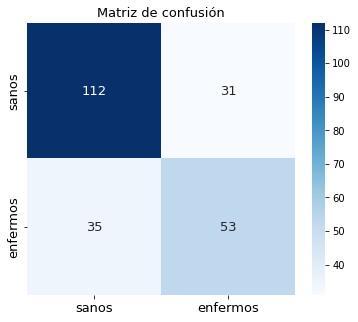

In [16]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [17]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Prediction:   {metrics.precision_score(y_test, y_pred, [1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, [1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, [1], average="macro")}' )

Accuracy  :   0.7142857142857143
Kappa     :   0.38888888888888884
predicción enfermos
Prediction:   0.6309523809523809
Recall    :   0.6022727272727273
Specificity:   0.7832167832167832
F1-score   :   0.6162790697674418


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [19]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)
  loss_train, _,recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 0.485 recall: 63.900% val_loss: 0.519 val_recall: 51.945%
loss: 0.492 recall: 51.037% val_loss: 0.493 val_recall: 49.266%
loss: 0.469 recall: 58.921% val_loss: 0.539 val_recall: 53.898%
loss: 0.485 recall: 68.050% val_loss: 0.442 val_recall: 44.241%
loss: 0.544 recall: 21.992% val_loss: 0.522 val_recall: 52.199%
loss: 0.471 recall: 71.784% val_loss: 0.390 val_recall: 39.034%
loss: 0.598 recall: 25.311% val_loss: 0.632 val_recall: 63.229%
loss: 0.543 recall: 19.087% val_loss: 0.598 val_recall: 59.849%
loss: 0.609 recall: 86.364% val_loss: 0.558 val_recall: 55.809%
loss: 0.470 recall: 52.066% val_loss: 0.479 val_recall: 47.880%


In [20]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
0.52% (+/- 0.22%)
==============================Test Recall Total 10 pliegues==============================
0.49% (+/- 0.27%)
==============================Train Loss Total 10 pliegues==============================
0.52% (+/- 0.05%)
==============================Test Loss Total 10 pliegues==============================
0.52% (+/- 0.07%)


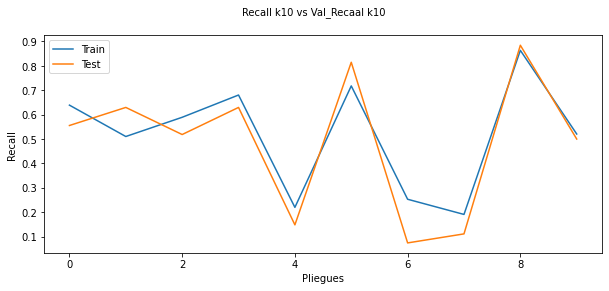

In [21]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

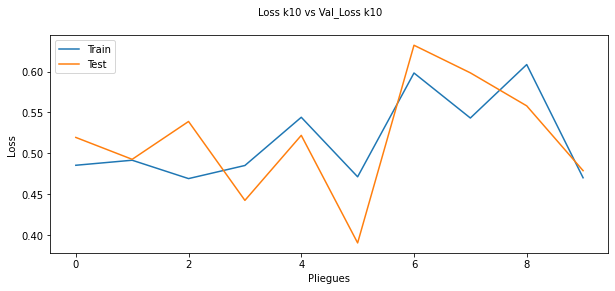

In [22]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)